# KONLPY SEMINAR

Web Page에 있는 한글로 된 뉴스, 블로그 Data를 URL로 불러들여 전처리 후 나온 Text부분 품사별 구분

*첫 번째 URL로 불러들인 Data의 한글이 깨져버린 경우

In [2]:
import urllib.request #urllib는 HTTP, FTP, Localfile 등에 관계없이 URL로 표현되는 모든 파일을 가져올 수 있다.
import re #정규표현식, 복잡한 문자열 처리
from bs4 import BeautifulSoup #HTML 파싱 라이브러리

파싱(Parsing) : 
"가공되지 않은 데이터에서 원하는 특정한 문자열을 빼내는 작업" 
출처 : 블로그(http://kiscuski.tistory.com/entry/%ED%8C%8C%EC%8B%B1Parsing%EC%9D%84-%EB%B0%B0%EC%9B%8C%EB%B3%B4%EC%9E%90-1%ED%8E%B8)


In [3]:
fail = urllib.request.urlopen('http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=105&oid=001&aid=0008410701')
print(fail.read(), 'utf-8').decode('euc-kr')
#print(fail.read(), 'utf-8').encode('euc-kr')
#print(fail.read(), 'euc-kr').encode('utf-8')
#print(fail.read(), 'euc-kr').decode('utf-8')

b'\r\n\r\n\r\n<!DOCTYPE HTML> \r\n<html lang="ko"> \r\n<head>\r\n<meta charset="euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<title>\xb0\xfa\xc7\xd0\xb1\xe2\xbc\xfa\xb0\xe8, \xc0\xcc\xb0\xf8\xb0\xe8 \xba\xb4\xbf\xaa\xc6\xaf\xb7\xca \xc6\xf3\xc1\xf6 \xb9\xdd\xb4\xeb \xc8\xae\xbb\xea(\xc1\xbe\xc7\xd5) : \xb3\xd7\xc0\xcc\xb9\xf6 \xb4\xba\xbd\xba</title>\r\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\t\n\t\t\n\t\t\n\t\n\t\n\t\n\n<meta property="me2:post_tag"\t\tcontent="\xbf\xac\xc7\xd5\xb4\xba\xbd\xba | \xb3\xd7\xc0\xcc\xb9\xf6\xb4\xba\xbd\xba"/>\n<meta property="me2:category1"\t\tcontent="\xbf\xac\xc7\xd5\xb4\xba\xbd\xba"/>\n<meta property="me2:category2"\t\tcontent="IT/\xb0\xfa\xc7\xd0"/>\n<meta property="me2:image"\t\t\tcontent=""/>\n\n<meta property="og:title"\t\t\tcontent="\xb0\xfa\xc7\xd0\xb1\xe2\xbc\xfa\xb0\xe8, \xc0\xcc\xb0\xf8\xb0\xe8 \xba\xb4\xbf\xaa\xc6\xaf\xb7\xca \xc6\xf3\xc1\xf6 \xb9\xdd\xb4\xeb \xc8\xae\xbb\xea(\xc1\xbe\xc7\xd5)"/>\n<meta property="og:type"\t\t

AttributeError: 'NoneType' object has no attribute 'decode'

*두 번째 URL로 불러들인 Data의 한글이 깨져버린 경우

In [11]:
url = 'http://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=105&oid=001&aid=0008410701'

fail2 = urllib.request.urlopen(url)

#url의 정보를 읽고 euc-kr로 decode하고 그 작업을 거친 후의 정보를 utf-8로 encode
#print(fail2.read().decode("utf-8").encode("euc-kr"))
print(fail2.read().decode("euc-kr").encode("utf-8")) 

b'\r\n\r\n\r\n<!DOCTYPE HTML> \r\n<html lang="ko"> \r\n<head>\r\n<meta charset="euc-kr">\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<title>\xea\xb3\xbc\xed\x95\x99\xea\xb8\xb0\xec\x88\xa0\xea\xb3\x84, \xec\x9d\xb4\xea\xb3\xb5\xea\xb3\x84 \xeb\xb3\x91\xec\x97\xad\xed\x8a\xb9\xeb\xa1\x80 \xed\x8f\x90\xec\xa7\x80 \xeb\xb0\x98\xeb\x8c\x80 \xed\x99\x95\xec\x82\xb0(\xec\xa2\x85\xed\x95\xa9) : \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\x89\xb4\xec\x8a\xa4</title>\r\n\n\n\t\n\t\n\t\t\n\t\n\n\n\t\n\t\t\n\t\t\n\t\t\n\t\n\t\n\t\n\n<meta property="me2:post_tag"\t\tcontent="\xec\x97\xb0\xed\x95\xa9\xeb\x89\xb4\xec\x8a\xa4 | \xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84\xeb\x89\xb4\xec\x8a\xa4"/>\n<meta property="me2:category1"\t\tcontent="\xec\x97\xb0\xed\x95\xa9\xeb\x89\xb4\xec\x8a\xa4"/>\n<meta property="me2:category2"\t\tcontent="IT/\xea\xb3\xbc\xed\x95\x99"/>\n<meta property="me2:image"\t\t\tcontent=""/>\n\n<meta property="og:title"\t\t\tcontent="\xea\xb3\xbc\xed\x95\x99\xea\xb8\xb0\xec\

*첫 번째 URL로 불러들인 Data의 한글이 제대로 나온경우

In [19]:
success = urllib.request.urlopen('http://www.naver.com')
print(success.read().decode('utf-8'))

<!doctype html>
<html lang="ko">
<head>
<meta charset="utf-8">
<meta http-equiv="Content-Script-Type" content="text/javascript">
<meta http-equiv="Content-Style-Type" content="text/css">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=960">
<meta name="apple-mobile-web-app-title" content="NAVER" />
<meta property="og:title" content="네이버 메인">
<meta property="og:url" content="http://www.naver.com/">
<meta property="og:image" content="http://static.naver.net/www/mobile/edit/2016/0407/mobile_17004159045.png">
<meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<meta name="twitter:card" content="summary">
<meta name="twitter:title" content="네이버 메인">
<meta name="twitter:url" content="http://www.naver.com/">
<meta name="twitter:image" content="http://static.naver.net/www/mobile/edit/2016/0407/mobile_17004159045.png">
<meta name="twitter:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요">
<link rel="shortcut icon" type="im

*두 번째 URL로 불러들인 Data의 한글이 제대로 나온경우

In [17]:
success2 = urllib.request.urlopen(url)

#BeautifulSoup객체를 이용하여 url 정보를 읽고, 한글(euc-kr)로 인코딩하여 출력물에 한글이 제대로 나오도록하여 변수 soup에 저장
soup = BeautifulSoup(success2.read(), from_encoding='euc-kr')

print(soup)

<!DOCTYPE HTML>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>과학기술계, 이공계 병역특례 폐지 반대 확산(종합) : 네이버 뉴스</title>
<meta content="연합뉴스 | 네이버뉴스" property="me2:post_tag"/>
<meta content="연합뉴스" property="me2:category1"/>
<meta content="IT/과학" property="me2:category2"/>
<meta content="" property="me2:image"/>
<meta content="과학기술계, 이공계 병역특례 폐지 반대 확산(종합)" property="og:title"/>
<meta content="article" property="og:type"/>
<meta content="http://news.naver.com/main/read.nhn?mode=LSD&amp;mid=sec&amp;oid=001&amp;aid=0008410701&amp;sid1=001" property="og:url"/>
<meta content="http://static.news.naver.net/image/news/ogtag/navernews_300x300_20150709.png" property="og:image"/>
<meta content='"과학기술발전 역사의 시계를 거꾸로 돌리는 일" (서울=연합뉴스) 신선미 기자 = 국방부가 병력을 확충하기 위해 이공계 병역특례를 단계적으로 폐지하겠다는 ...' property="og:description"/>
<meta content="연합뉴스 | 네이버 뉴스" property="og:article:author"/>
<meta content="summary" name="twitter:card"/>
<meta content="과학기술계, 이공계 병역특례 

C:\Users\leekeonhoon\Anaconda3\lib\site-packages\beautifulsoup4-4.4.1-py3.5.egg\bs4\__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [18]:
#soup 객체 안의 div 중 id가 articleBodyContents를 찾아 변수 article 저장
article = str(soup.find('div', id='articleBodyContents'))
print(article)

<div id="articleBodyContents">
<!-- 본문 내용 -->
	
	"과학기술발전 역사의 시계를 거꾸로 돌리는 일"<br/><br/>    (서울=연합뉴스) 신선미 기자 = 국방부가 병력을 확충하기 위해 이공계 병역특례를 단계적으로 폐지하겠다는 계획에 국내 과학기술계의 우려가 커지고 있다. <br/><br/>    이공계 병역특례는 산업기능요원과 전문연구요원으로 군 복무를 대신하는 제도로, 산업기능요원은 특정 자격증을 소유하고 중소기업에서 일정 기간 근무하는 것이고 전문연구요원은 석사 이상 학위 소지자가 병무청이 지정한 연구기관에서 연구개발(R&amp;D)을 하는 것이다.<br/><br/>    국내 과학기술 관련 단체의 모임인 대한민국과학기술대연합(대과연)은 18일 성명을 내고 "500만 과학기술인을 대변하는 대과연은 국방부의 이공계 병역특례 폐지에 대해 큰 우려와 함께 강력하게 반대한다"고 밝혔다. <br/><br/>    대과연은 "정부는 경쟁력 있는 과학기술 인력양성을 진정 포기하려는 것인가"라며 "누가 군의관, 법무관으로 갈 수 있는 타 분야와 대비해 과학기술계로 올 것인가. 과학기술 연구인력이 어떤 경력으로 연구하고 있는지 면밀히 검토해 보아야 한다"고 전했다. <br/><br/>    대과연은 또 "벤처기업에서의 인재유치에 중요한 기능을 하는 산업기능요원제도 졸속폐지의 부작용을 어떻게 감당하려 할 것인지도 우려된다"면서 "인구감소에 따른 국방력 감소에 대한 대안을 마련해야 함은 당연하나 현대의 국방은 고도의 과학기술 기반에서 유지되는 것이라는 인식을 확실히 할 필요가 있다"고 밝혔다.<br/><br/>    과학기술특성화대학 학생들도 반대의 목소리를 내고 있다. <br/><br/>    KAIST(한국과학기술원), GIST(광주과학기술원), DGIST(대구경북과학기술원), UNIST(울산과학기술원) 총학생회 대표들은 19일 오전 국회 정론관에 모여 합동 기자회견을 열기로 했다. <br/><br/>    이들은 앞으로 재학생 대상

Python RE(정규 표현식, Regular Expression) 모듈 참고 사이트
http://devanix.tistory.com/296

In [21]:
#re모듈의 sub메소드는 string에서 pattern과 일치하는 부분에 대하여 repl로 교체하여 결과 문자열을 반환
#re.sub(pattern, repl, string)

result = re.sub('[A-Za-z0-9\/=<!--"-->@▶:/<*/>.;_…?·]', '', article)
print(result)

 
 본문 내용 
	
	과학기술발전 역사의 시계를 거꾸로 돌리는 일    서울연합뉴스 신선미 기자  국방부가 병력을 확충하기 위해 이공계 병역특례를 단계적으로 폐지하겠다는 계획에 국내 과학기술계의 우려가 커지고 있다     이공계 병역특례는 산업기능요원과 전문연구요원으로 군 복무를 대신하는 제도로 산업기능요원은 특정 자격증을 소유하고 중소기업에서 일정 기간 근무하는 것이고 전문연구요원은 석사 이상 학위 소지자가 병무청이 지정한 연구기관에서 연구개발을 하는 것이다    국내 과학기술 관련 단체의 모임인 대한민국과학기술대연합대과연은 일 성명을 내고 만 과학기술인을 대변하는 대과연은 국방부의 이공계 병역특례 폐지에 대해 큰 우려와 함께 강력하게 반대한다고 밝혔다     대과연은 정부는 경쟁력 있는 과학기술 인력양성을 진정 포기하려는 것인가라며 누가 군의관 법무관으로 갈 수 있는 타 분야와 대비해 과학기술계로 올 것인가 과학기술 연구인력이 어떤 경력으로 연구하고 있는지 면밀히 검토해 보아야 한다고 전했다     대과연은 또 벤처기업에서의 인재유치에 중요한 기능을 하는 산업기능요원제도 졸속폐지의 부작용을 어떻게 감당하려 할 것인지도 우려된다면서 인구감소에 따른 국방력 감소에 대한 대안을 마련해야 함은 당연하나 현대의 국방은 고도의 과학기술 기반에서 유지되는 것이라는 인식을 확실히 할 필요가 있다고 밝혔다    과학기술특성화대학 학생들도 반대의 목소리를 내고 있다     한국과학기술원 광주과학기술원 대구경북과학기술원 울산과학기술원 총학생회 대표들은 일 오전 국회 정론관에 모여 합동 기자회견을 열기로 했다     이들은 앞으로 재학생 대상 서명운동 등을 통해 등 병역특례 폐지를 막기 위해 공동으로 대응해 나갈 예정이다    새누리당 서상기 의원과 송희경 당선인도 일 국내 과학기술계의 목소리에 힘을 실어주는 기자회견문을 발표했다     서 의원과 송 당선인은 기자회견문을 통해 국방부에서 준비하고 있는 이공계 대체복무 폐지 계획은 지난 반세기 대한민국의 경제성장을 이끌어 온 

sub 메소드 : 주어진 string 전체에서 pattern과 일치하는 모든것을 repl(replace)로 교체하고, 결과를 str(string)타입으로 반환
    repl(replace)는 문자열이 될 수도 있고, 함수가 될 수도 있다.

In [25]:
#split() : 문자열의 공백을 기준으로 분리하는 메소드
#result내용의 공백을 기준으로 분리하여 변수 tok에 하나씩 저장하고 그 저장된 것을 차례로 리스트에 저장하고 변수 tokens에 저장

tokens = [tok for tok in result.split()]
print('Total no of tokens : '+ str(len(tokens)))
print(tokens[:])

Total no of tokens : 362
['본문', '내용', '과학기술발전', '역사의', '시계를', '거꾸로', '돌리는', '일', '서울연합뉴스', '신선미', '기자', '국방부가', '병력을', '확충하기', '위해', '이공계', '병역특례를', '단계적으로', '폐지하겠다는', '계획에', '국내', '과학기술계의', '우려가', '커지고', '있다', '이공계', '병역특례는', '산업기능요원과', '전문연구요원으로', '군', '복무를', '대신하는', '제도로', '산업기능요원은', '특정', '자격증을', '소유하고', '중소기업에서', '일정', '기간', '근무하는', '것이고', '전문연구요원은', '석사', '이상', '학위', '소지자가', '병무청이', '지정한', '연구기관에서', '연구개발을', '하는', '것이다', '국내', '과학기술', '관련', '단체의', '모임인', '대한민국과학기술대연합대과연은', '일', '성명을', '내고', '만', '과학기술인을', '대변하는', '대과연은', '국방부의', '이공계', '병역특례', '폐지에', '대해', '큰', '우려와', '함께', '강력하게', '반대한다고', '밝혔다', '대과연은', '정부는', '경쟁력', '있는', '과학기술', '인력양성을', '진정', '포기하려는', '것인가라며', '누가', '군의관', '법무관으로', '갈', '수', '있는', '타', '분야와', '대비해', '과학기술계로', '올', '것인가', '과학기술', '연구인력이', '어떤', '경력으로', '연구하고', '있는지', '면밀히', '검토해', '보아야', '한다고', '전했다', '대과연은', '또', '벤처기업에서의', '인재유치에', '중요한', '기능을', '하는', '산업기능요원제도', '졸속폐지의', '부작용을', '어떻게', '감당하려', '할', '것인지도', '우려된다면서', '인구감소에', '따른', '국방력', '감소에', '대한', '대안을'

In [26]:
tokens = re.split('\W+', result) #\W : 숫자 또는 문자가 아닌것과 매치됨(^a-zA-Z0-9)

print(len(tokens))
print(tokens[:])

364
['', '본문', '내용', '과학기술발전', '역사의', '시계를', '거꾸로', '돌리는', '일', '서울연합뉴스', '신선미', '기자', '국방부가', '병력을', '확충하기', '위해', '이공계', '병역특례를', '단계적으로', '폐지하겠다는', '계획에', '국내', '과학기술계의', '우려가', '커지고', '있다', '이공계', '병역특례는', '산업기능요원과', '전문연구요원으로', '군', '복무를', '대신하는', '제도로', '산업기능요원은', '특정', '자격증을', '소유하고', '중소기업에서', '일정', '기간', '근무하는', '것이고', '전문연구요원은', '석사', '이상', '학위', '소지자가', '병무청이', '지정한', '연구기관에서', '연구개발을', '하는', '것이다', '국내', '과학기술', '관련', '단체의', '모임인', '대한민국과학기술대연합대과연은', '일', '성명을', '내고', '만', '과학기술인을', '대변하는', '대과연은', '국방부의', '이공계', '병역특례', '폐지에', '대해', '큰', '우려와', '함께', '강력하게', '반대한다고', '밝혔다', '대과연은', '정부는', '경쟁력', '있는', '과학기술', '인력양성을', '진정', '포기하려는', '것인가라며', '누가', '군의관', '법무관으로', '갈', '수', '있는', '타', '분야와', '대비해', '과학기술계로', '올', '것인가', '과학기술', '연구인력이', '어떤', '경력으로', '연구하고', '있는지', '면밀히', '검토해', '보아야', '한다고', '전했다', '대과연은', '또', '벤처기업에서의', '인재유치에', '중요한', '기능을', '하는', '산업기능요원제도', '졸속폐지의', '부작용을', '어떻게', '감당하려', '할', '것인지도', '우려된다면서', '인구감소에', '따른', '국방력', '감소에', '대한', '대안을', '마련해야', '함은', '

In [28]:
import operator #operator 연산 함수 모듈

In [30]:
freq_dis = {}

for tok in result:
    if tok in freq_dis:
        freq_dis[tok]+=1
    else:
        freq_dis[tok]=1

sorted_freq_dist = sorted(freq_dis.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_freq_dist[:])

[(' ', 421), ('기', 42), ('과', 30), ('학', 26), ('대', 26), ('이', 25), ('의', 25), ('는', 25), ('다', 24), ('을', 23), ('에', 22), ('지', 20), ('고', 20), ('하', 19), ('인', 19), ('연', 18), ('국', 18), ('술', 18), ('로', 16), ('원', 15), ('계', 15), ('가', 15), ('서', 14), ('은', 14), ('구', 12), ('해', 11), ('있', 11), ('요', 11), ('력', 11), ('업', 11), ('한', 10), ('성', 10), ('전', 10), ('일', 10), ('제', 9), ('정', 9), ('방', 9), ('부', 9), ('도', 8), ('자', 8), ('문', 8), ('리', 8), ('소', 8), ('회', 8), ('수', 8), ('것', 7), ('를', 7), ('산', 7), ('역', 7), ('공', 7), ('무', 7), ('특', 7), ('발', 7), ('내', 7), ('려', 6), ('폐', 6), ('으', 6), ('병', 6), ('생', 5), ('유', 5), ('재', 5), ('경', 5), ('등', 5), ('관', 5), ('당', 5), ('견', 5), ('나', 5), ('들', 5), ('반', 5), ('위', 5), ('체', 5), ('라', 5), ('\n', 5), ('중', 5), ('우', 5), ('용', 4), ('여', 4), ('감', 4), ('주', 4), ('능', 4), ('례', 4), ('만', 4), ('와', 4), ('시', 4), ('합', 4), ('사', 4), ('장', 4), ('상', 4), ('미', 4), ('어', 4), ('스', 4), ('명', 4), ('난', 4), ('진', 4), ('밝', 3), ('[', 3), ('단

KoNLPy (Korean NLP with Python)

POS Tagging : 
자연어 처리 과정에서 하나의 단어가 여러 품사를 갖는 모호성을 가질 수 있으며 
이러한 품사의 모호성을 해소하는 과정을 품사 태깅(Part-Of-Speech Tagging)이라 한다.

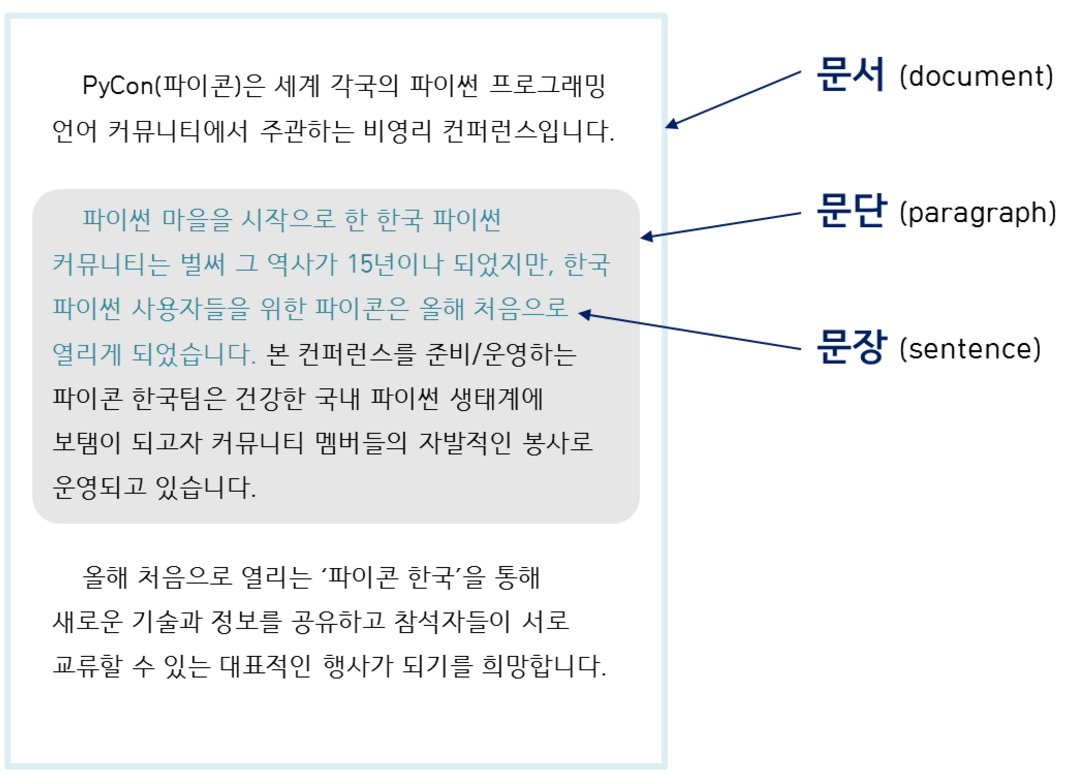

In [1]:
from IPython.display import Image
Image("C:/Users/leekeonhoon/Desktop/konlpy1.jpg")

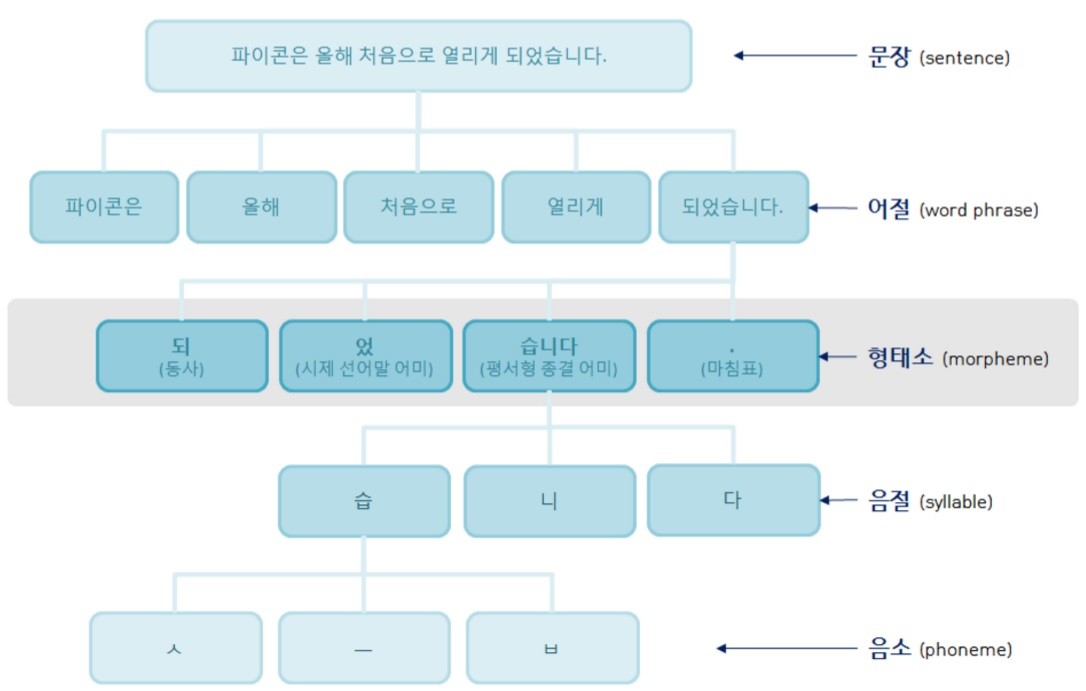

In [2]:
Image("C:/Users/leekeonhoon/Desktop/konlpy2.jpg")

출처 : https://www.lucypark.kr/slides/2014-pyconkr/#1 

In [31]:
from konlpy.utils import pprint

from konlpy.tag import Hannanum
from konlpy.tag import Komoran
from konlpy.tag import Twitter
from konlpy.tag import Mecab
from konlpy.tag import Kkma

In [32]:
kkma = Kkma()
pprint(kkma.sentences(result)) 
#text내용을 변수 result에 저장했는데, kkma.sentences(result)는 변수 result에 있는 내용 중 문장단위를 출력.

['본문 내용 과학기술발전 역사의 시계를 거꾸로 돌리는 일 서울연합 뉴스 신선미 기자 국방부가 병력을 확충하기 위해 이공계 병역 특례를 '
 '단계적으로 폐지하겠다는 계획에 국내 과학 기술계의 우려가 커지고 있다 이공계 병역 특례는 산업기능요원과 전문연구요원으로 군 복무를 '
 '대신하는 제도로 산업기능요원은 특정 자격증을 소유하고 중소기업에서 일정 기간 근무하는 것이고 전문연구요원은 석사 이상 학위 소지자가 '
 '병무청이 지정한 연구기관에서 연구개발을 하는 것이다 국내 과학기술 관련 단체의 모임인 대한민국과학 기술대연합 대과 연은 일 성명을 내고 '
 '만 과학 기술인을 대변하는 대과 연은 국방부의 이공계 병역 특례 폐지에 대해 큰 우려와 함께 강력하게 반대한다고 밝혔다 대과 연은 정부는 '
 '경쟁력 있는 과학기술 인력 양성을 진정 포기하려는 것인 가라며 누가 군의 관 법무관으로 갈 수 있는 타 분야와 대비해 과학 기술계로 올 '
 '것인가 과학기술 연구인력이 어떤 경력으로 연구하고 있는지 면밀히 검토해 보아야 한다고 전했다 대과 연은 또 벤처기업에서의 인재 유치에 '
 '중요한 기능을 하는 산업기능요원제도 졸속 폐지의 부작용을 어떻게 감당하려 할 것인지도 우려된다면서 인구 감소에 따른 국방력 감소에 대한 '
 '대안을 마련해야 함은 당연하나 현대의 국방은 고도의 과학기술 기반에서 유지되는 것이라는 인식을 확실히 할 필요가 있다고',
 '밝혔다 과학기술 특성화대학 학생들도 반대의 목소리를 내고 있다 한국과학 기술원 광주과학 기술원 대구경 북과학 기술원 울산과학 기술원 '
 '총학생회 대표들은 일 오전 국회 정론 관에 모여 합동 기자회견을 열기로 했다 이들은 앞으로 재학생 대상 서명운동 등을 통해 등 병역 특례 '
 '폐지를 막기 위해 공동으로 대응해 나갈 예정이다 새 누리 당 서상기 의원과 송 희경 당선인도 일 국내 과학 기술계의 목소리에 힘을 실어 '
 '주는 기자회견 문을 발표했다 서 의원과 송 당선인은 기자회견 문을 통해 국방부에서 준비하고 있는 이

In [33]:
pprint(kkma.morphs(result))
#kkma.morphs(result)는 변수 result에 있는 내용 중 형태소 단위를 출력.

['본문',
 '내용',
 '과학',
 '기술',
 '발전',
 '역사',
 '의',
 '시계',
 '를',
 '거꾸로',
 '돌리',
 '는',
 '일',
 '서울',
 '연합',
 '뉴스',
 '신선미',
 '기자',
 '국방부',
 '가',
 '병력',
 '을',
 '확충',
 '하',
 '기',
 '위하',
 '어',
 '이공계',
 '병역',
 '특례',
 '를',
 '단계적',
 '으로',
 '폐지',
 '하',
 '겠',
 '다는',
 '계획',
 '에',
 '국내',
 '과학',
 '기술계',
 '의',
 '우려',
 '가',
 '커지',
 '고',
 '있',
 '다',
 '이공계',
 '병역',
 '특례',
 '는',
 '산업',
 '기능',
 '요원',
 '과',
 '전문',
 '연구',
 '요원',
 '으로',
 '군',
 '복무',
 '를',
 '대신',
 '하',
 '는',
 '제도',
 '로',
 '산업',
 '기능',
 '요원',
 '은',
 '특정',
 '자격증',
 '을',
 '소유',
 '하',
 '고',
 '중소기업',
 '에서',
 '일정',
 '기간',
 '근무',
 '하',
 '는',
 '것',
 '이',
 '고',
 '전문',
 '연구',
 '요원',
 '은',
 '석사',
 '이상',
 '학위',
 '소지자',
 '가',
 '병무청',
 '이',
 '지정',
 '하',
 'ㄴ',
 '연구',
 '기관',
 '에서',
 '연구',
 '개발',
 '을',
 '하',
 '는',
 '것',
 '이',
 '다',
 '국내',
 '과학',
 '기술',
 '관련',
 '단체',
 '의',
 '모임',
 '이',
 'ㄴ',
 '대한민국',
 '과학',
 '기술대',
 '연합',
 '대과',
 '연',
 '은',
 '일',
 '성명',
 '을',
 '내',
 '고',
 '말',
 'ㄴ',
 '과학',
 '기술인',
 '을',
 '대변',
 '하',
 '는',
 '대과',
 '연',
 '은',
 '국방부',
 '의',
 '이공계',
 

In [34]:
pprint(kkma.nouns(result))
#kkma.nouns(result)는 변수 result에 있는 내용 중 명사를 출력.

['본문',
 '내용',
 '과학',
 '과학기술발전',
 '기술',
 '발전',
 '역사',
 '시계',
 '일',
 '서울',
 '서울연합뉴스',
 '연합',
 '뉴스',
 '신선미',
 '기자',
 '국방부',
 '병력',
 '확충',
 '이공계',
 '병역',
 '병역특례',
 '특례',
 '단계적',
 '폐지',
 '계획',
 '국내',
 '과학기술계',
 '기술계',
 '우려',
 '산업',
 '산업기능요원',
 '기능',
 '요원',
 '전문',
 '전문연구요원',
 '연구',
 '군',
 '복무',
 '대신',
 '제도',
 '특정',
 '자격증',
 '소유',
 '중소기업',
 '일정',
 '기간',
 '근무',
 '석사',
 '이상',
 '학위',
 '소지자',
 '병무청',
 '지정',
 '연구기관',
 '기관',
 '연구개발',
 '개발',
 '과학기술',
 '관련',
 '단체',
 '모임',
 '대한',
 '대한민국',
 '대한민국과학기술대연합',
 '민국',
 '기술대',
 '대과',
 '대과연',
 '연',
 '성명',
 '과학기술인',
 '기술인',
 '대변',
 '반대',
 '정부',
 '경쟁력',
 '인력',
 '인력양성',
 '양성',
 '진정',
 '포기',
 '누',
 '군의',
 '군의관',
 '관',
 '법무관',
 '수',
 '타',
 '분야',
 '대비',
 '연구인력',
 '경력',
 '검토',
 '벤처',
 '벤처기업',
 '기업',
 '인재',
 '인재유치',
 '유치',
 '중요',
 '산업기능요원제도',
 '졸속',
 '졸속폐지',
 '부작용',
 '감당',
 '인구',
 '인구감소',
 '감소',
 '국방력',
 '대안',
 '마련',
 '함',
 '현대',
 '국방',
 '고도',
 '기반',
 '유지',
 '인식',
 '필요',
 '과학기술특성화대학',
 '특성화',
 '대학',
 '학생',
 '목소리',
 '한국',
 '한국과학기술원',
 '기술원',
 '광주',
 '광주과학기술원',
 '대구경',


In [35]:
pprint(kkma.pos(result))
#kkma.pos(result)는 변수 result에 있는 내용 중 단어와 품사를 함께 출력.

[('본문', 'NNG'),
 ('내용', 'NNG'),
 ('과학', 'NNG'),
 ('기술', 'NNG'),
 ('발전', 'NNG'),
 ('역사', 'NNG'),
 ('의', 'JKG'),
 ('시계', 'NNG'),
 ('를', 'JKO'),
 ('거꾸로', 'MAG'),
 ('돌리', 'VV'),
 ('는', 'ETD'),
 ('일', 'NNG'),
 ('서울', 'NNG'),
 ('연합', 'NNG'),
 ('뉴스', 'NNG'),
 ('신선미', 'NNG'),
 ('기자', 'NNG'),
 ('국방부', 'NNG'),
 ('가', 'JKS'),
 ('병력', 'NNG'),
 ('을', 'JKO'),
 ('확충', 'NNG'),
 ('하', 'XSV'),
 ('기', 'ETN'),
 ('위하', 'VV'),
 ('어', 'ECS'),
 ('이공계', 'NNG'),
 ('병역', 'NNG'),
 ('특례', 'NNG'),
 ('를', 'JKO'),
 ('단계적', 'NNG'),
 ('으로', 'JKM'),
 ('폐지', 'NNG'),
 ('하', 'XSV'),
 ('겠', 'EPT'),
 ('다는', 'ETD'),
 ('계획', 'NNG'),
 ('에', 'JKM'),
 ('국내', 'NNG'),
 ('과학', 'NNG'),
 ('기술계', 'NNG'),
 ('의', 'JKG'),
 ('우려', 'NNG'),
 ('가', 'JKS'),
 ('커지', 'VV'),
 ('고', 'ECE'),
 ('있', 'VXV'),
 ('다', 'ECS'),
 ('이공계', 'NNG'),
 ('병역', 'NNG'),
 ('특례', 'NNG'),
 ('는', 'JX'),
 ('산업', 'NNG'),
 ('기능', 'NNG'),
 ('요원', 'NNG'),
 ('과', 'JC'),
 ('전문', 'NNG'),
 ('연구', 'NNG'),
 ('요원', 'NNG'),
 ('으로', 'JKM'),
 ('군', 'NNG'),
 ('복무', 'NNG'),
 ('를', 'JKO

In [36]:
allpos = kkma.pos(result)

In [37]:
allnoun = [word for word, pos in allpos if pos in ['NNG']]
alladjv = [word for word, pos in allpos if pos in ['VA', 'AJ']]

In [38]:
len(allnoun)

353

In [39]:
for i in allnoun:
    print (i)

본문
내용
과학
기술
발전
역사
시계
일
서울
연합
뉴스
신선미
기자
국방부
병력
확충
이공계
병역
특례
단계적
폐지
계획
국내
과학
기술계
우려
이공계
병역
특례
산업
기능
요원
전문
연구
요원
군
복무
제도
산업
기능
요원
특정
자격증
소유
중소기업
일정
기간
근무
전문
연구
요원
석사
이상
학위
소지자
병무청
지정
연구
기관
연구
개발
국내
과학
기술
관련
단체
모임
대한민국
과학
기술대
연합
대과
연
일
성명
과학
기술인
대변
대과
연
국방부
이공계
병역
특례
폐지
우려
반대
대과
연
정부
경쟁력
과학
기술
인력
양성
진정
포기
누
군의
관
법무관
타
분야
대비
과학
기술계
과학
기술
연구
인력
경력
연구
검토
대과
연
벤처
기업
인재
유치
중요
기능
산업
기능
요원
제도
졸속
폐지
부작용
감당
우려
인구
감소
국방력
감소
대안
마련
함
현대
국방
고도
과학
기술
기반
유지
인식
필요
과학
기술
특성화
대학
학생
반대
목소리
한국
과학
기술원
광주
과학
기술원
대구경
북
과학
기술원
울산
과학
기술원
총학생회
대표
일
오전
국회
정론
관
기자
회견
앞
재학생
대상
서명
운동
통해
병역
특례
폐지
공동
대응
예정
누리
당
서상기
의원
송
희경
당선인
일
국내
과학
기술계
목소리
힘
기자
회견
문
발표
서
의원
송
당선인
기자
회견
문
국방부
준비
이공계
대체
복무
폐지
계획
반세기
대한민국
경제
성장
과학
기술
발전
역사
시계
일
일
박근
대통령
주재
제회
과학
기술
전략
회의
대학
기초
연구
인력
양성
기지
체질
발표
일주일
만
국방부
정책
추진
과학
기술계
낭패감
기자
회견
문
제도
적용
학생
천여
위성
로봇
국방
항공
국가
과제
여
산업체
위탁
연구
개발
과제
수행
졸업
후
창업
산
업계
진출
우리나라
산업
발전
이바지
만약
국방부
일방적
대체
복무
폐지
추진
국민
혈세
투입
연구
수포
인력난
중소기업
인력
부족
심화
미래
창조
과학
부
전문
연구
요원
박사
과정
국가
기여
우수
이공계
인력
유입
양성
중요성
현행
제도
유지
필요
입장
고수
클릭
명

In [40]:
len(alladjv)

5

In [41]:
for i in alladjv:
    print (i)

크
어떻
어떻
엄청나
희


In [42]:
h = Hannanum()
pprint(h.analyze(result))

[[[('본문', 'ncn')]],
 [[('내용', 'ncn')], [('내', 'ncn'), ('용', 'xsncc')]],
 [],
 [[('과학기술발전', 'ncpa')],
  [('과학기술', 'ncn'), ('발전', 'ncpa')],
  [('과학기술', 'ncn'), ('발', 'ncn'), ('전', 'xsnx')],
  [('과학', 'ncn'), ('기술발전', 'ncpa')],
  [('과학', 'ncn'), ('기술', 'ncn'), ('발전', 'ncpa')],
  [('과학', 'ncn'), ('기술', 'ncn'), ('발', 'ncn'), ('전', 'xsnx')],
  [('과학', 'ncn'), ('기술', 'ncpa'), ('발전', 'ncpa')],
  [('과학', 'ncn'), ('기술', 'ncpa'), ('발', 'ncn'), ('전', 'xsnx')]],
 [[('역사', 'ncn'), ('의', 'jcm')], [('역사', 'ncn'), ('의', 'ncn')]],
 [[('시계', 'ncn'), ('를', 'jco')]],
 [[('거꾸로', 'mag')]],
 [[('돌리', 'ncn'), ('는', 'jxc')],
  [('돌리', 'pvg'), ('는', 'etm')],
  [('돌', 'pvg'), ('ㄹ', 'etm'), ('리', 'nbn'), ('는', 'jxc')],
  [('돌', 'pvg'), ('리', 'ef'), ('는', 'etm')],
  [('돌', 'pvg'), ('리', 'ep'), ('는', 'etm')]],
 [[('일', 'nbu')],
  [('일', 'ncn')],
  [('일', 'ncpa')],
  [('일', 'ncps')],
  [('일', 'nnc')],
  [('일', 'pvg'), ('ㄹ', 'etm')],
  [('이', 'pvg'), ('ㄹ', 'etm')]],
 [[('서울연합뉴스', 'ncn')], [('서울연합뉴스', 'nqq')]],
 [[('신선

In [43]:
pprint(h.morphs(result))

['본문',
 '내용',
 '과학기술발전',
 '역사',
 '의',
 '시계',
 '를',
 '거꾸로',
 '돌리',
 '는',
 '일',
 '서울연합뉴스',
 '신선미',
 '기',
 '이',
 '자',
 '국방부',
 '가',
 '병력',
 '을',
 '확충',
 '하',
 '기',
 '위하',
 '어',
 '이공계',
 '병역특례',
 '를',
 '단계적',
 '으로',
 '폐',
 '이',
 '지',
 '하',
 '겠다는',
 '계획',
 '에',
 '국내',
 '과학기술계',
 '의',
 '우려',
 '가',
 '크',
 '어',
 '지',
 '고',
 '있',
 '다',
 '이공계',
 '병역특례',
 '는',
 '산업기능요원',
 '과',
 '전문연구요원',
 '으로',
 '굴',
 'ㄴ',
 '복무',
 '를',
 '대신',
 '하',
 '는',
 '제도',
 '로',
 '산업기능요원',
 '은',
 '특정',
 '자격증',
 '을',
 '소유',
 '하고',
 '중소기업',
 '에서',
 '일정',
 '기간',
 '근무',
 '하',
 '는',
 '것',
 '이',
 '고',
 '전문연구요원',
 '은',
 '석사',
 '이상',
 '학위',
 '소지자',
 '가',
 '병무청',
 '이',
 '지정',
 '하',
 'ㄴ',
 '연구기관',
 '에서',
 '연구개발',
 '을',
 '하',
 '는',
 '것',
 '이',
 '다',
 '국내',
 '과학기술',
 '관련',
 '단체',
 '의',
 '모임',
 '이',
 'ㄴ',
 '대한민국과학기술대연합대과연',
 '은',
 '일',
 '성명',
 '을',
 '내',
 '고',
 '말',
 'ㄴ',
 '과학기술인',
 '을',
 '대변',
 '하',
 '는',
 '대과연',
 '은',
 '국방부',
 '의',
 '이공계',
 '병역특례',
 '폐지',
 '에',
 '대',
 '어',
 '하',
 '어',
 '크',
 'ㄴ',
 '우려',
 '와',
 '함께',
 '강력',
 '하',
 '게',


In [44]:
pprint(h.nouns(result))

['본문',
 '내용',
 '과학기술발전',
 '역사',
 '시계',
 '일',
 '서울연합뉴스',
 '신선미',
 '기',
 '국방부',
 '병력',
 '확충',
 '이공계',
 '병역특례',
 '단계적',
 '폐',
 '계획',
 '국내',
 '과학기술계',
 '우려',
 '이공계',
 '병역특례',
 '산업기능요원',
 '전문연구요원',
 '복무',
 '대신',
 '제도',
 '산업기능요원',
 '특정',
 '자격증',
 '소유',
 '중소기업',
 '일정',
 '기간',
 '근무',
 '것',
 '전문연구요원',
 '석사',
 '이상',
 '학위',
 '소지자',
 '병무청',
 '지정',
 '연구기관',
 '연구개발',
 '것',
 '국내',
 '과학기술',
 '관련',
 '단체',
 '모임',
 '대한민국과학기술대연합대과연',
 '일',
 '성명',
 '과학기술인',
 '대변',
 '대과연',
 '국방부',
 '이공계',
 '병역특례',
 '폐지',
 '우려',
 '강력',
 '반대',
 '대과연',
 '정부',
 '경쟁력',
 '과학기술',
 '인력양성',
 '진정',
 '포기',
 '것',
 '누구',
 '군의관',
 '법무관',
 '수',
 '분야',
 '대비해',
 '과학기술계',
 '것',
 '과학기술',
 '연구인력',
 '경력',
 '연구',
 '검토',
 '대과연',
 '벤처기업',
 '인재유치',
 '중요',
 '기능',
 '산업기능요원제도',
 '졸속폐지',
 '부작용',
 '감당',
 '것',
 '우려된다',
 '인구감소',
 '국방력',
 '감소',
 '대안',
 '마련',
 '당연',
 '현대',
 '국방',
 '고도',
 '과학기술',
 '기반',
 '유',
 '것',
 '식',
 '필요',
 '과학기술특성화대학',
 '학생들',
 '반대',
 '목소리',
 '한국과학기술원',
 '광주과학기술원',
 '대구경북과학기술원',
 '울산과학기술원',
 '총학생회',
 '대표들',
 '일',
 '오전',
 '국회',
 '정론관',


In [45]:
pprint(h.pos(result))

[('본문', 'N'),
 ('내용', 'N'),
 ('과학기술발전', 'N'),
 ('역사', 'N'),
 ('의', 'J'),
 ('시계', 'N'),
 ('를', 'J'),
 ('거꾸로', 'M'),
 ('돌리', 'P'),
 ('는', 'E'),
 ('일', 'N'),
 ('서울연합뉴스', 'N'),
 ('신선미', 'N'),
 ('기', 'N'),
 ('이', 'J'),
 ('자', 'E'),
 ('국방부', 'N'),
 ('가', 'J'),
 ('병력', 'N'),
 ('을', 'J'),
 ('확충', 'N'),
 ('하', 'X'),
 ('기', 'E'),
 ('위하', 'P'),
 ('어', 'E'),
 ('이공계', 'N'),
 ('병역특례', 'N'),
 ('를', 'J'),
 ('단계적', 'N'),
 ('으로', 'J'),
 ('폐', 'N'),
 ('이', 'J'),
 ('지', 'E'),
 ('하', 'P'),
 ('겠다는', 'E'),
 ('계획', 'N'),
 ('에', 'J'),
 ('국내', 'N'),
 ('과학기술계', 'N'),
 ('의', 'J'),
 ('우려', 'N'),
 ('가', 'J'),
 ('크', 'P'),
 ('어', 'E'),
 ('지', 'P'),
 ('고', 'E'),
 ('있', 'P'),
 ('다', 'E'),
 ('이공계', 'N'),
 ('병역특례', 'N'),
 ('는', 'J'),
 ('산업기능요원', 'N'),
 ('과', 'J'),
 ('전문연구요원', 'N'),
 ('으로', 'J'),
 ('굴', 'P'),
 ('ㄴ', 'E'),
 ('복무', 'N'),
 ('를', 'J'),
 ('대신', 'N'),
 ('하', 'X'),
 ('는', 'E'),
 ('제도', 'N'),
 ('로', 'J'),
 ('산업기능요원', 'N'),
 ('은', 'J'),
 ('특정', 'N'),
 ('자격증', 'N'),
 ('을', 'J'),
 ('소유', 'N'),
 ('하고', 'J'),
 ('중소기업

In [46]:
allpos2 = h.pos(result)

In [47]:
allnoun2 = [word for word, pos in allpos2 if pos in ['N']]
alladjv2 = [word for word, pos in allpos2 if pos in ['V']]

In [48]:
for i in allnoun2:
    print (i)

본문
내용
과학기술발전
역사
시계
일
서울연합뉴스
신선미
기
국방부
병력
확충
이공계
병역특례
단계적
폐
계획
국내
과학기술계
우려
이공계
병역특례
산업기능요원
전문연구요원
복무
대신
제도
산업기능요원
특정
자격증
소유
중소기업
일정
기간
근무
것
전문연구요원
석사
이상
학위
소지자
병무청
지정
연구기관
연구개발
것
국내
과학기술
관련
단체
모임
대한민국과학기술대연합대과연
일
성명
과학기술인
대변
대과연
국방부
이공계
병역특례
폐지
우려
강력
반대
대과연
정부
경쟁력
과학기술
인력양성
진정
포기
것
누구
군의관
법무관
수
분야
대비해
과학기술계
것
과학기술
연구인력
경력
연구
검토
대과연
벤처기업
인재유치
중요
기능
산업기능요원제도
졸속폐지
부작용
감당
것
우려된다
인구감소
국방력
감소
대안
마련
당연
현대
국방
고도
과학기술
기반
유
것
식
필요
과학기술특성화대학
학생들
반대
목소리
한국과학기술원
광주과학기술원
대구경북과학기술원
울산과학기술원
총학생회
대표들
일
오전
국회
정론관
합동
기자회견
이
앞
재학생
대상
서명운동
등
등
병역특례
폐
공동
대응
예정
새누리당
서상기
의원
송희경
당선인도
일
국내
과학기술계
목소리
힘
기자회견문
발표
의원
송
당선인
기자회견문
국방부
준비
이공계
대체복무
폐
계획
반세기
대한민국
경제성장
과학기술발전
역사
시계
일
일
박근혜
대통령
주재
제회
과학기술전략회의
대학
기초연구
인력양성
기지
체질
발표
지
불
일주일
만
국방부
이
정책
추진
것
과학기술계
낭패감
기자회견문
제도
적용
학생들
천여
건천억
원
위성
로봇
국방
항공
등
국
과제
여
건억
원
산업체
위탁
연구개발
과제
수행
중
졸업
후
창업
산업계
진출
우리나라
산업
발전
이바
국방부
일방적
대체복무
폐지
추진
수천억
원
국민
혈세
투입
연구
수포
수
인력난
중소기업
인력
부족
심화
미래창조과학부
전문연구요원박사과정
국
기
우수
이공계
인력
유입양성
중요성
등
현행제도
유지
필요
입장
고수
[핫클릭]
명색
베스트셀러
시인인데최영미
생활보조금
[핫클릭]
쉬렵니다흰개미

In [49]:
for i in alladjv2:
    print (i)

In [51]:
komo = Komoran()
pprint(komo.morphs(result))

java.lang.OutOfMemoryErrorPyRaisable: java.lang.OutOfMemoryError: GC overhead limit exceeded

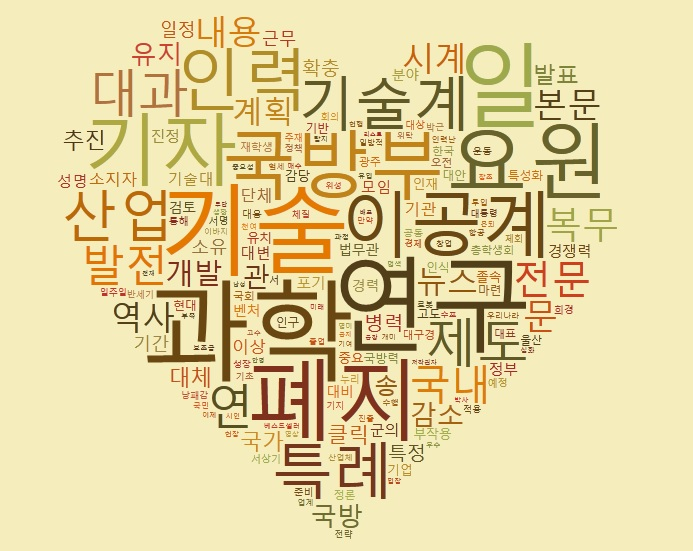

In [1]:
from IPython.display import Image
Image("C:/Users/leekeonhoon/Desktop/wordcloud.jpg")